# <font color=blue>Decision Tree</font>

### Gini index and information gain both of these methods are used to select from the n attributes of the dataset which attribute would be placed at the root node or the internal node.

### <font color='red'>Gini index</font>
#### Gini Index is a metric to measure how often a randomly chosen element would be incorrectly identified.
#### It means an attribute with lower gini index should be preferred.
#### Sklearn supports “gini” criteria for Gini Index and by default, it takes “gini” value.

### <font color='red'>Entropy</font>
#### Entropy is the measure of uncertainty of a random variable, it characterizes the impurity of an arbitrary collection of examples. The higher the entropy the more the information content.

### <font color='red'>Information Gain</font>
#### The entropy typically changes when we use a node in a decision tree to partition the training instances into smaller subsets. Information gain is a measure of this change in entropy.
#### Sklearn supports “entropy” criteria for Information Gain and if we want to use Information Gain method in sklearn then we have to mention it explicitly.

### <font color='red'>Accuracy score</font>
#### Accuracy score is used to calculate the accuracy of the trained classifier.

### <font color='red'>Confusion Matrix</font>
#### Confusion Matrix is used to understand the trained classifier behavior over the test dataset or validate dataset.

### To calculate the Gini impurity of the left leaf, we subtract 1 by the fraction of people that are married squared and the fraction of people that aren’t married squared.

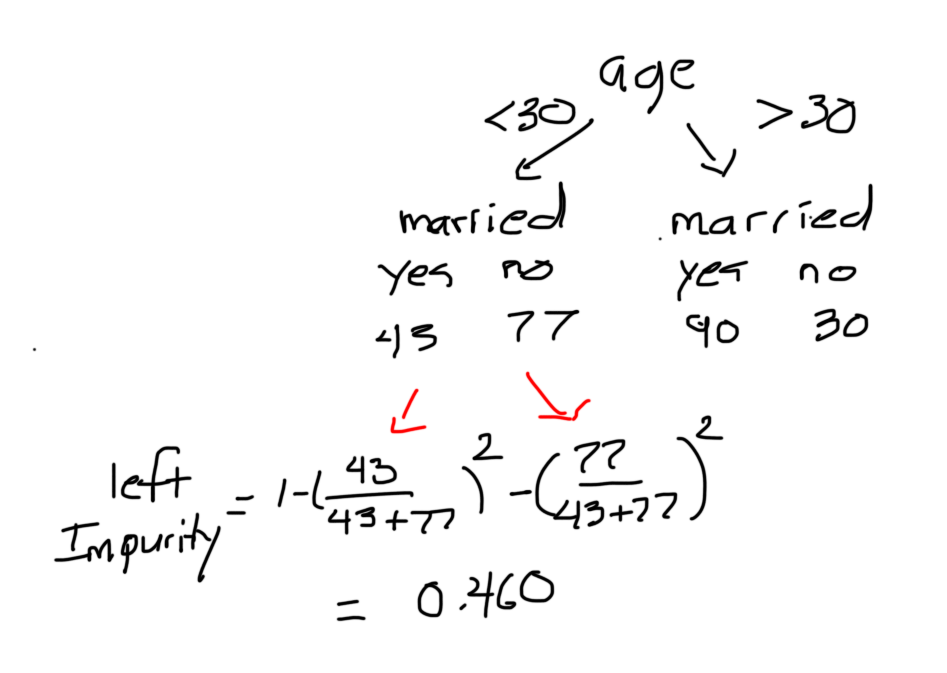

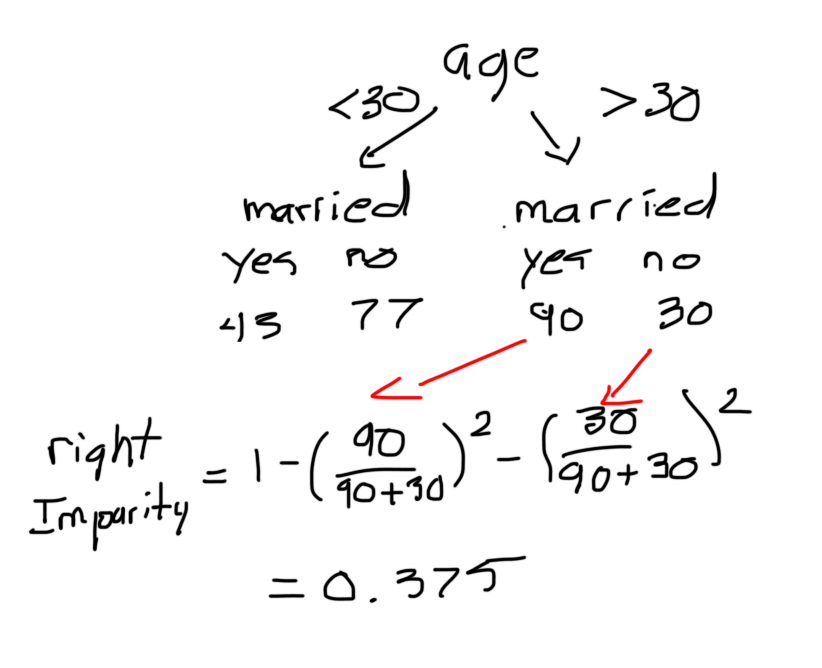

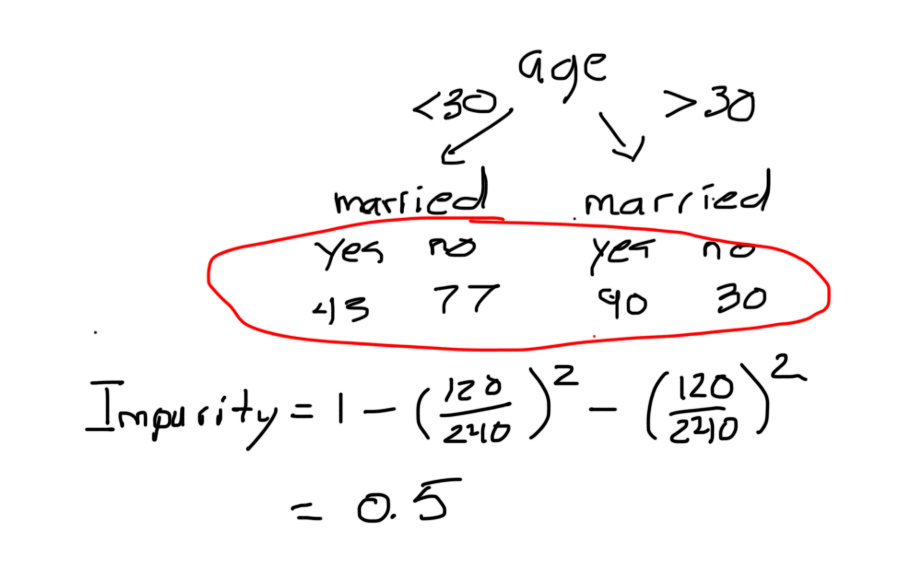

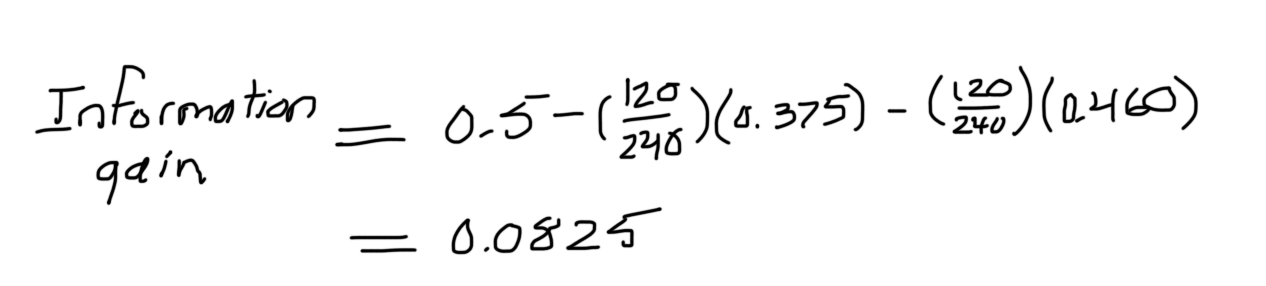

### Gini Impurity
#### If we have CC total classes and p(i)p(i) is the probability of picking a datapoint with class ii, then the Gini Impurity is calculated as
 
#### G = p(1)∗(1−p(1))+p(2)∗(1−p(2))
#### =0.5∗(1−0.5)+0.5∗(1−0.5)

### There are many algorithms there to build a decision tree. They are
#### <font color=red>CART (Classification and Regression Trees) — This makes use of Gini impurity as metric.
#### <font color=red>ID3 (Iterative Dichotomiser 3) — This uses entropy and information gain as metric.

In [ ]:
#!pip install graphviz

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

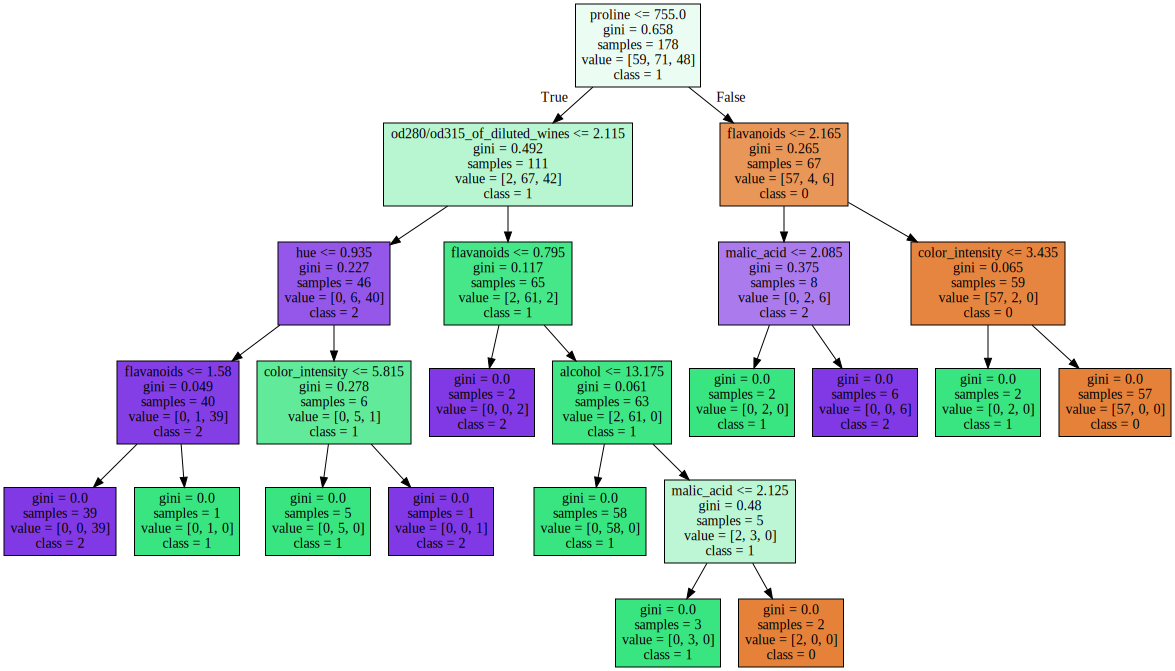

In [1]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
# load dataset
data = load_wine()

# feature matrix
X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names

# print dataset description
print(data.DESCR)
estimator = DecisionTreeClassifier()
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True))
display(SVG(graph.pipe(format='svg')))

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

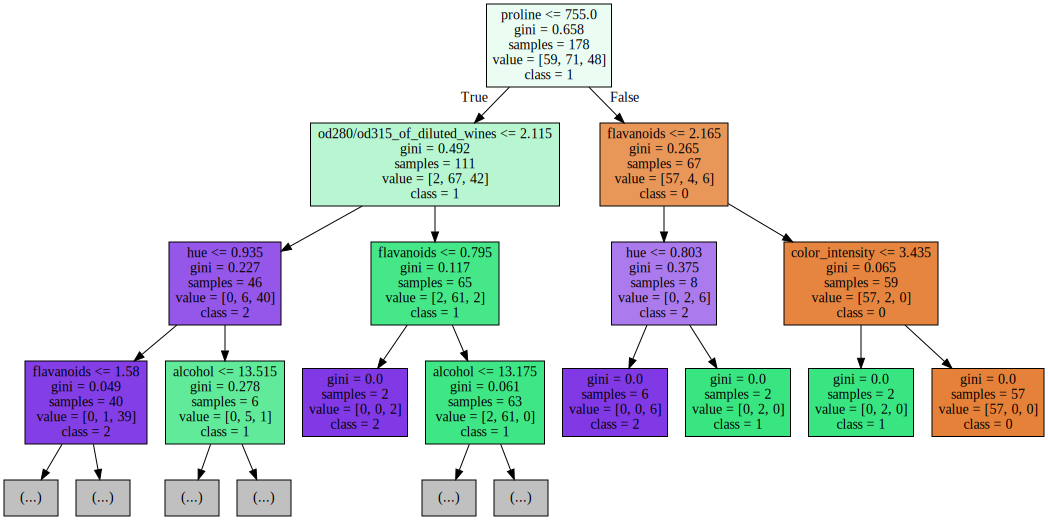

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
# load dataset
data = load_wine()

# feature matrix
X = data.data

# target vector
y = data.target

# class labels
labels = data.feature_names

# print dataset description
print(data.DESCR)
estimator = DecisionTreeClassifier()
estimator.fit(X, y)

graph = Source(tree.export_graphviz(estimator, out_file=None
   , feature_names=labels, class_names=['0', '1', '2'] 
   , filled = True, max_depth=3))
display(SVG(graph.pipe(format='svg')))

In [3]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import display                               
from ipywidgets import interactive
# load dataset
data = load_wine()
# feature matrix
X = data.data
# target vector
y = data.target
# class labels
labels = data.feature_names

def plot_tree(crit, split, depth, min_split, min_leaf=0.2):   
    estimator = DecisionTreeClassifier(random_state = 0 
          , criterion = crit
          , splitter = split
          , max_depth = depth
          , min_samples_split=min_split
          , min_samples_leaf=min_leaf)
    estimator.fit(X, y)    
    graph = Source(tree.export_graphviz(estimator
          , out_file=None
          , feature_names=labels
          , class_names=['0', '1', '2']
          , filled = True))   
    display(SVG(graph.pipe(format='svg')))  
    return estimator

inter=interactive(plot_tree 
   , crit = ["gini", "entropy"]
   , split = ["best", "random"]
   , depth=[1,2,3,4]
   , min_split=(0.1,1)
   , min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…